In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict

In [221]:
csv_path = Path('data128v192//')
sgd = defaultdict(list)
class_mates = ['Abhipray', 'Jatin', 'arda', 'Marina']
class_mates_sgd = defaultdict(list)
for csv in sorted(list(csv_path.glob('*.csv'))):
    pps, track = csv.stem.split('_')[:2]
    df = pd.read_csv(csv, skiprows=5,names=['Test file','Session 1', 'Average'])
    for index, row in df.iterrows():
        sgd[row['Test file']].append(row['Average'])
        if pps in class_mates:
            class_mates_sgd[row['Test file']].append(row['Average'])            

In [230]:
df = pd.DataFrame(sgd)
df

,castanet_128.wav,castanet_192.wav,glockenspiel_128.wav,glockenspiel_192.wav,harpsichord_192.wav,harpsichord_128.wav,quar48_1_192.wav,quar48_1_128.wav,spfe_128.wav,spfe_192.wav,spmg_128.wav,spmg_192.wav
0,-2.0,-0.5,-2.0,-0.1,-1.5,-3.0,0.0,0.0,-3.0,0.0,-2.0,-0.1
1,-2.0,0.0,-1.5,-1.0,1.0,-2.5,0.0,0.0,0.0,0.0,0.0,0.0
2,-2.0,-1.0,-1.5,-0.5,-1.0,-2.0,-0.5,-1.0,-1.5,-0.5,-1.5,-0.5
3,-3.0,-1.0,-3.0,0.3,0.0,-3.0,-0.1,0.0,-1.5,0.0,-1.0,0.0
4,-3.0,-2.0,-2.0,-0.2,-2.0,-1.5,0.0,-0.1,-2.0,-1.5,-2.0,0.0
5,-0.5,-0.3,-0.5,-0.3,-0.2,-1.0,-0.2,-0.1,-0.5,-0.1,-0.3,0.1
6,0.0,0.0,-2.0,0.0,0.0,-4.0,0.0,0.0,-2.0,0.0,-1.0,0.0
7,-3.0,1.5,-3.0,-0.5,-1.0,-4.0,0.0,0.0,-3.0,-1.0,-2.0,0.0
8,-1.0,-1.0,-1.5,0.5,-1.3,-2.0,-0.5,-1.5,-1.0,-1.0,-2.0,-0.5
9,-0.8,-0.2,-1.5,-0.5,-0.8,-1.5,0.1,0.1,-0.7,-0.4,-0.8,-0.3


In [231]:
df_sorted = df.sort_values(by=0, axis=1, ascending=False)

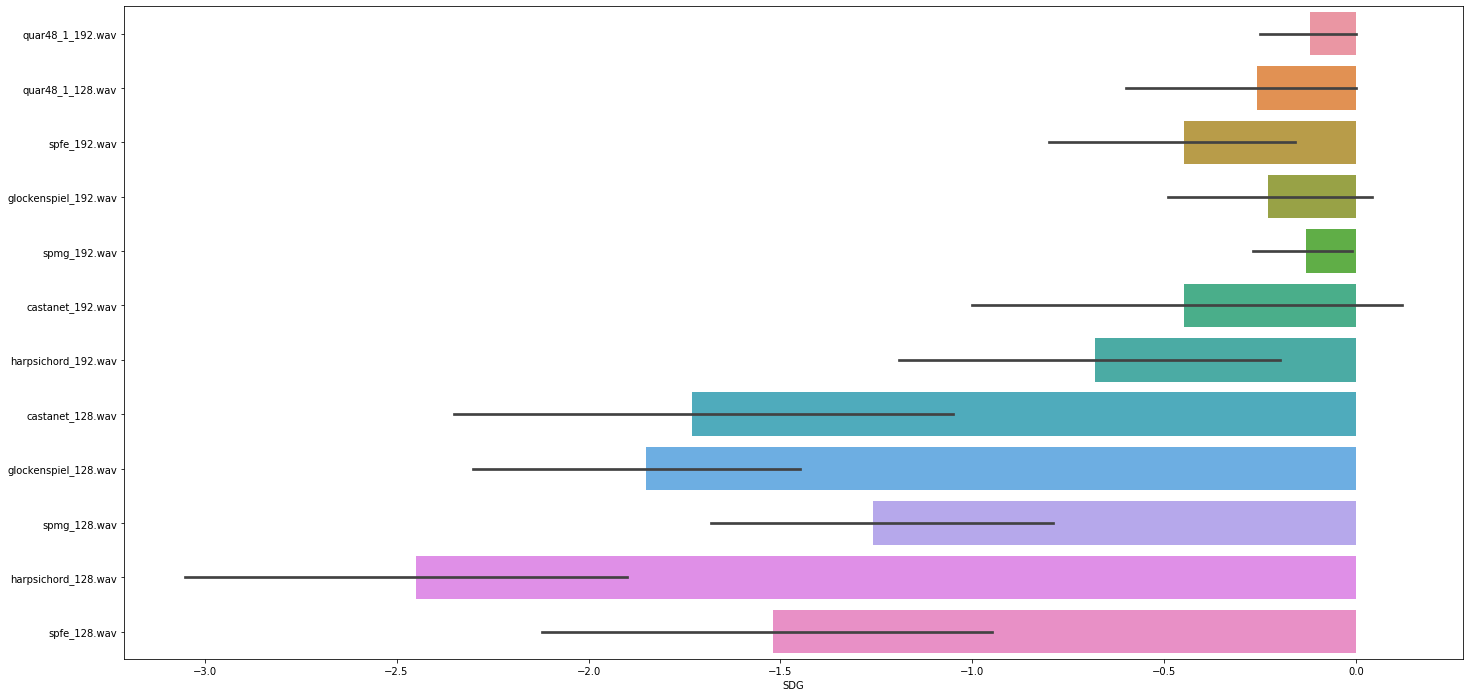

In [233]:
plt.figure(figsize=(24,12));
sns.barplot(data=df_sorted, orient='h');
plt.xlabel('SDG')
plt.savefig('all_codecs_sdg.png', dpi=230)

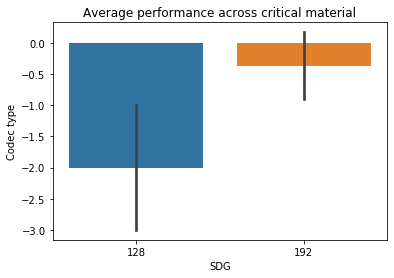

In [225]:
# Analyze average per method
avg_perf = defaultdict(list)
for col in df:
    qtype = Path(col).stem.split('_')[-1]
    avg_perf[qtype].append(df[col][0])
sns.barplot(data=pd.DataFrame(avg_perf), ci='sd');
plt.xlabel('SDG')
plt.ylabel('Codec type')
plt.title('Average performance across critical material')
plt.savefig('avg_codec_performance_classmates.png', dpi=250)

In [226]:
df = df.reindex(sorted(df.columns), axis=1)

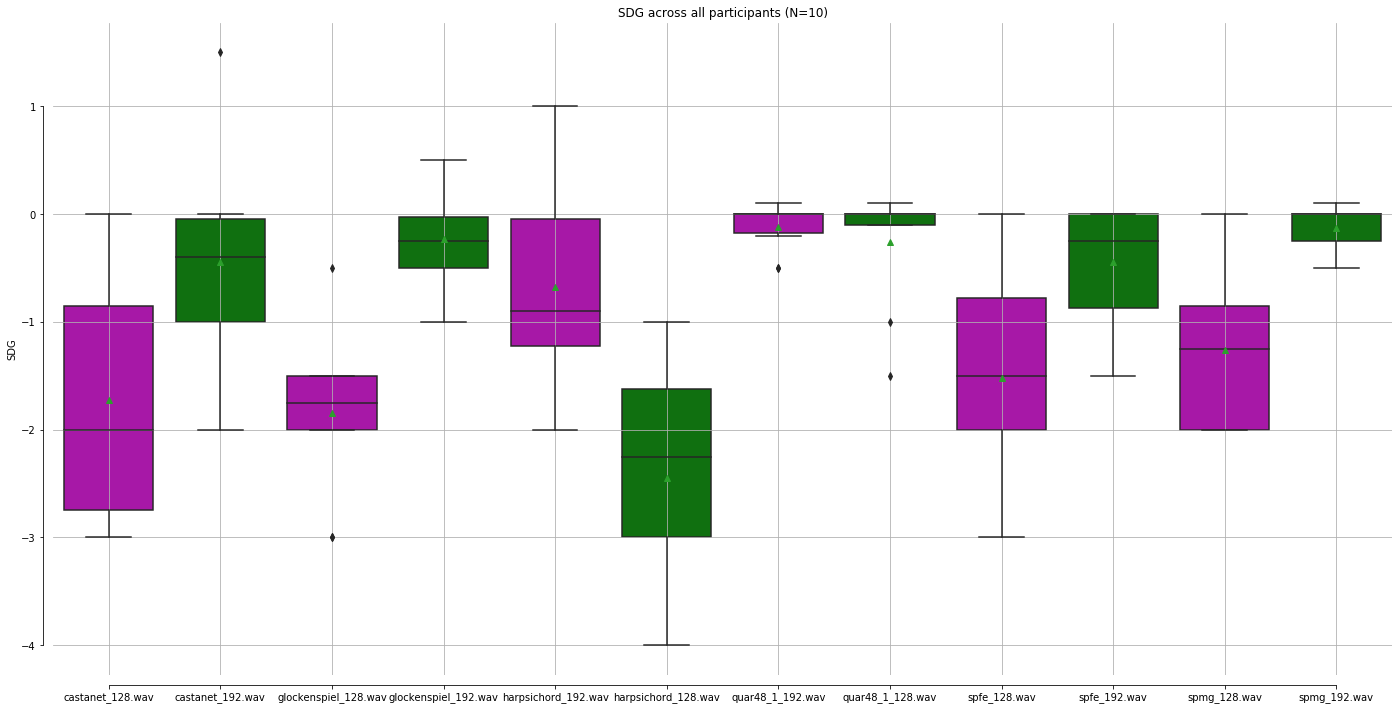

In [234]:
plt.figure(figsize=(24,12));
sns.boxplot(data=df, showmeans=True, orient='v', palette=["m", "g"]);
plt.grid();
plt.ylabel('SDG');
plt.title(f'SDG across all participants (N={len(df)})');
plt.savefig('sdg_analysis.png', dpi=250);
sns.despine(offset=10, trim=True)    